In [6]:
import matplotlib.font_manager as fm
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

['C:\\Windows\\Fonts\\arialbi.ttf', 'C:\\WINDOWS\\Fonts\\SitkaI.ttc', 'C:\\Windows\\Fonts\\PARCHM.TTF', 'C:\\WINDOWS\\Fonts\\calibri.ttf', 'C:\\WINDOWS\\Fonts\\CENTURY.TTF', 'C:\\WINDOWS\\Fonts\\corbelz.ttf', 'C:\\Windows\\Fonts\\MTEXTRA.TTF', 'C:\\WINDOWS\\Fonts\\msyh.ttc', 'C:\\WINDOWS\\Fonts\\msjhbd.ttc', 'C:\\WINDOWS\\Fonts\\PENHL.TTF', 'C:\\WINDOWS\\Fonts\\TCCM____.TTF', 'C:\\WINDOWS\\Fonts\\ENBODBI.TTF', 'C:\\Windows\\Fonts\\CENTURY.TTF', 'C:\\WINDOWS\\Fonts\\Art.ttf', 'C:\\WINDOWS\\Fonts\\ENGARM.TTF', 'C:\\Windows\\Fonts\\himalaya.ttf', 'C:\\WINDOWS\\Fonts\\HANSomaM.ttf', 'C:\\WINDOWS\\Fonts\\MN.TTF', 'C:\\WINDOWS\\Fonts\\segoeuiz.ttf', 'C:\\Windows\\Fonts\\MB.TTF', 'C:\\WINDOWS\\Fonts\\corbeli.ttf', 'C:\\WINDOWS\\Fonts\\HMKMMAG.TTF', 'C:\\Windows\\Fonts\\BRITANIC.TTF', 'C:\\Windows\\Fonts\\LHANDW.TTF', 'C:\\WINDOWS\\Fonts\\PERTIBD.TTF', 'C:\\WINDOWS\\Fonts\\seguisb.ttf', 'C:\\WINDOWS\\Fonts\\YINJ05.TTF', 'C:\\WINDOWS\\Fonts\\GIGI.TTF', 'C:\\Windows\\Fonts\\HYBDAL.TTF', 'C:\\WIN

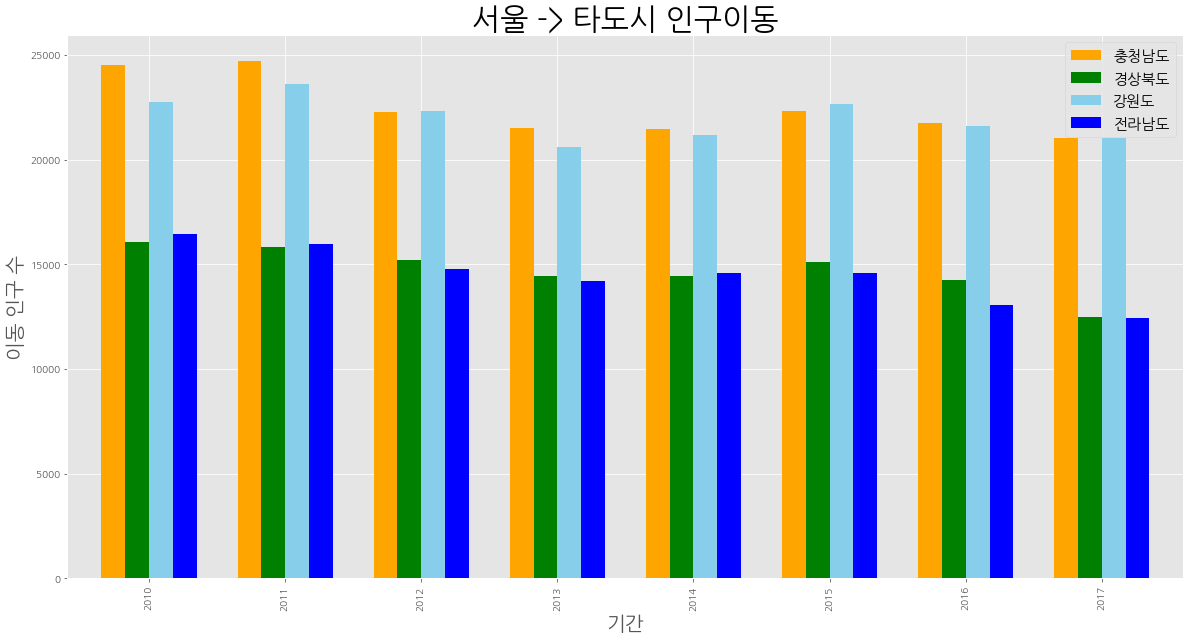

In [8]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='bar',figsize=(20, 10),width=0.7, color=['orange','green','skyblue','blue'])

plt.title('서울 -> 타도시 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

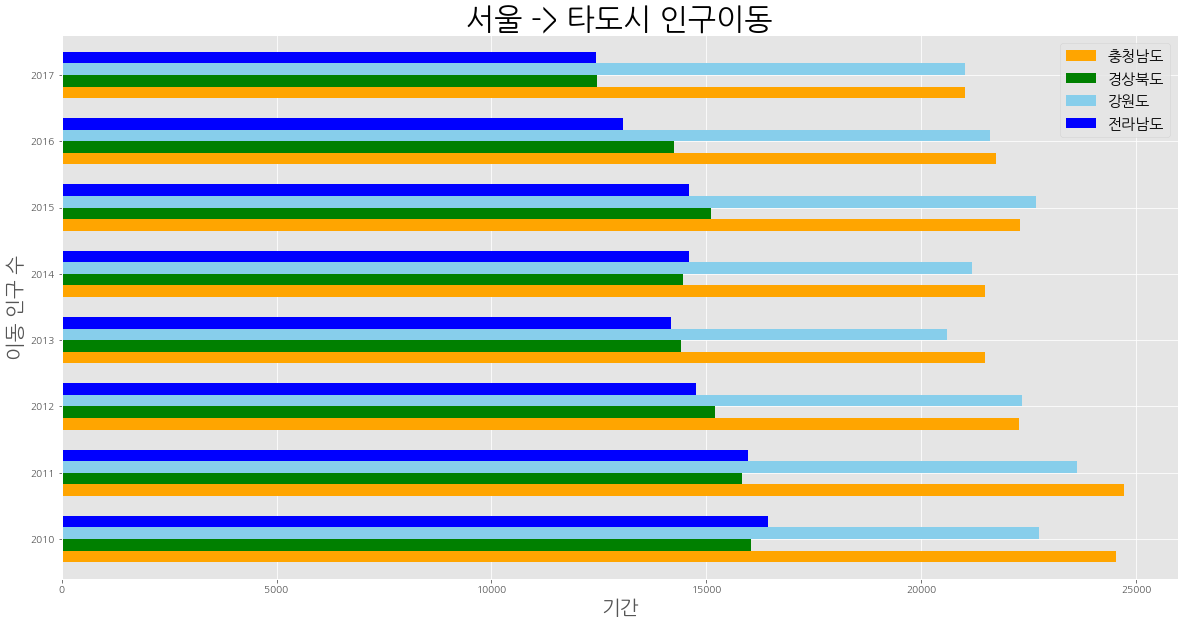

In [9]:


# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기
df_4.plot(kind='barh',figsize=(20, 10),width=0.7, color=['orange','green','skyblue','blue'])

plt.title('서울 -> 타도시 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

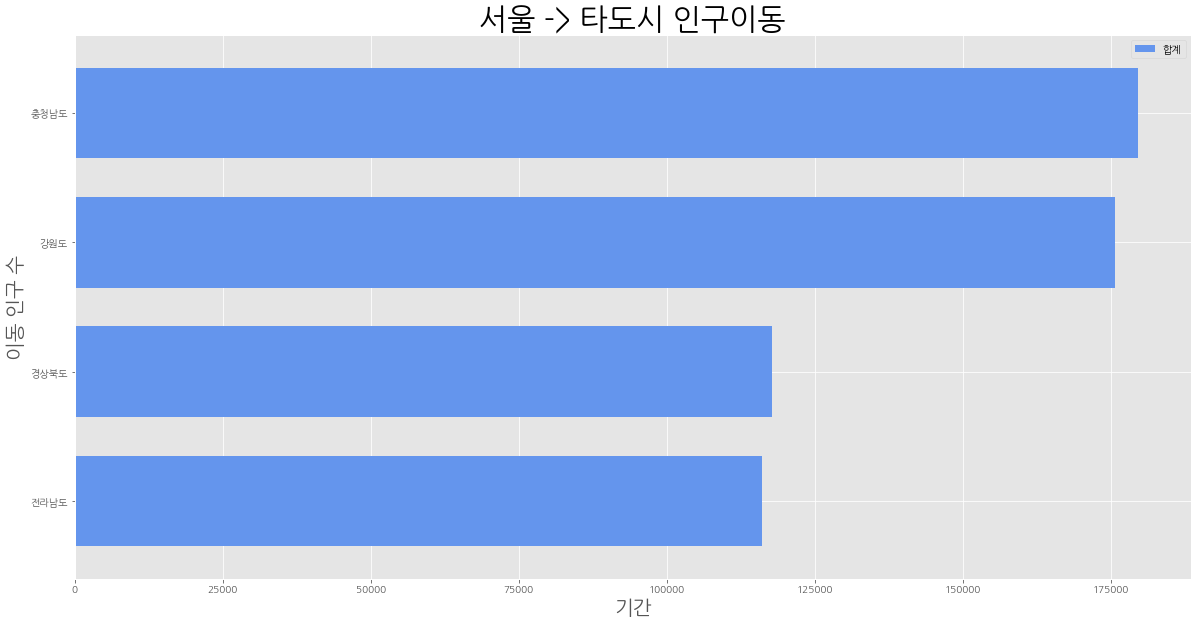

In [20]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

#2010년~2017까지 이동인구 합계 하여 세로운 열로 추가
df_4["합계"]=df_4.sum(axis=1)
#가장 큰값부터 정렬
df_total=df_4[["합계"]].sort_values(by="합계",ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot') 

# 막대 그래프 그리기
df_total.plot(kind='barh',figsize=(20, 10),width=0.7, color=['cornflowerblue'])

plt.title('서울 -> 타도시 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best')